# Converting Text to Embeddings

This notebook demonstrates two ways to convert text into embedding vectors:
1) Train a tiny Word2Vec model on a toy corpus.
2) (Optional) Use a pretrained transformer (BERT) to get a sentence embedding.

Run the cells top-to-bottom. The transformer example downloads a model the first time you run it.

## 1) Word2Vec (toy example)

We train a tiny Word2Vec model and inspect the embedding vector for a word.

In [1]:
# Install dependencies (skip any you don't need)
%pip install -q gensim scikit-learn transformers

Note: you may need to restart the kernel to use updated packages.


In [2]:
from gensim.models import Word2Vec

# Sample corpus of sentences
sentences = [
    ["i", "love", "nlp"],
    ["embeddings", "are", "fun"],
    ["nlp", "embeddings", "are", "cool"],
]

# Train a Word2Vec model on the sentences
w2v_model = Word2Vec(sentences, vector_size=5, min_count=1, epochs=100)

# Get the embedding vector for a word
word = "nlp"
embedding_vector = w2v_model.wv[word]
print(f"Embedding for '{word}': {embedding_vector}")

Embedding for 'nlp': [ 0.14759758 -0.03064255 -0.09062872  0.13113031 -0.09734187]


**Interpretation:** The printed vector is a 5-dimensional coordinate in the embedding space. Even with a tiny dataset, Word2Vec tries to place words used in similar contexts close together. In real applications, we train on much larger corpora to get meaningful embeddings.

**Tip:** You can visualize embeddings by projecting them down to 2D using PCA or t-SNE and then plotting. That makes the idea of “semantic closeness” easier to see.

## Visualize embeddings in 2D (PCA)

We can project word vectors down to 2D and plot them to see which words end up close together.

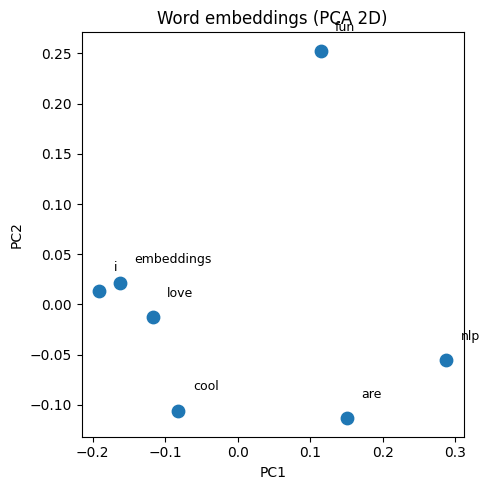

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Collect word vectors
vocab = w2v_model.wv.index_to_key
vectors = np.array([w2v_model.wv[w] for w in vocab])

# Reduce to 2D with PCA
pca = PCA(n_components=2, random_state=42)
points_2d = pca.fit_transform(vectors)

# Plot
plt.figure(figsize=(5, 5))
plt.scatter(points_2d[:, 0], points_2d[:, 1], s=80)
for word, (x, y) in zip(vocab, points_2d):
    plt.text(x + 0.02, y + 0.02, word, fontsize=9)

plt.title("Word embeddings (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.show()

## 2) Transformer-based embeddings (optional)

This example uses a pretrained BERT model to get a sentence embedding by averaging token embeddings. It downloads the model the first time you run it.

In [4]:
# (Optional) If you skipped installing transformers above, install it here
# %pip install -q transformers

In [5]:
import torch
from transformers import AutoTokenizer, AutoModel

# Load a pre-trained transformer model (BERT base)
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
bert_model = AutoModel.from_pretrained("bert-base-uncased")

# Example sentence
sentence = "Embeddings capture semantic meaning of text."

# Get token embeddings from the model
inputs = tokenizer(sentence, return_tensors="pt")
outputs = bert_model(**inputs)

token_embeddings = outputs.last_hidden_state  # shape: (1, seq_len, hidden_dim)
sentence_embedding = token_embeddings.mean(dim=1).detach().numpy()

print("Sentence embedding shape:", sentence_embedding.shape)
print("Sentence embedding vector:", sentence_embedding)

Loading weights:   0%|          | 0/199 [00:00<?, ?it/s]

BertModel LOAD REPORT from: bert-base-uncased
Key                                        | Status     |  | 
-------------------------------------------+------------+--+-
cls.seq_relationship.weight                | UNEXPECTED |  | 
cls.predictions.transform.LayerNorm.bias   | UNEXPECTED |  | 
cls.predictions.bias                       | UNEXPECTED |  | 
cls.seq_relationship.bias                  | UNEXPECTED |  | 
cls.predictions.transform.dense.bias       | UNEXPECTED |  | 
cls.predictions.transform.dense.weight     | UNEXPECTED |  | 
cls.predictions.transform.LayerNorm.weight | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


Sentence embedding shape: (1, 768)
Sentence embedding vector: [[ 1.44435093e-01  1.48043603e-01 -1.40833542e-01  1.51708558e-01
   3.91571559e-02 -3.95715348e-02  7.14942142e-02  1.96887657e-01
   2.68456131e-01 -3.26309621e-01 -2.67006904e-01 -2.50165850e-01
  -1.00423999e-01  3.06657702e-01 -1.35327339e-01  2.79599756e-01
  -3.16777043e-02 -3.45868692e-02  4.89900298e-02 -2.61189789e-03
   1.96940780e-01  2.39006147e-01 -6.09374881e-01  3.16591054e-01
   8.76068592e-01 -7.62774423e-02 -1.80607811e-01  4.27321196e-01
  -2.68428385e-01 -3.00185233e-01  1.17597543e-01  3.44148278e-01
  -3.61563087e-01 -2.71899611e-01  9.49067995e-02  4.31599841e-03
  -1.23895667e-01 -3.50827247e-01 -1.91048026e-01 -7.34581277e-02
  -7.08991528e-01 -2.21606001e-01  1.50940165e-01 -1.23618238e-01
  -1.30931899e-01 -4.59135443e-01 -2.48029575e-01 -9.43283662e-02
  -1.70593813e-01 -1.50109291e-01 -9.60970938e-01  2.72720098e-01
   2.68267724e-03  2.06473112e-01 -4.57085259e-02  1.05273259e+00
  -2.03883171e

**Interpretation:** The sentence embedding is a 768-dimensional vector (BERT-base hidden size). Similar sentences tend to produce vectors that are closer together in this high-dimensional space, while unrelated sentences are farther apart.